# Chapter 4 : Activation Functions

Pg: 72 - 110

- Activation Functions are applied on the output of a neuron: Activation(input*weight)
- What they do is they modify the output of the neuron (introduce non-linearity)
- The reason we need them is the allow the hidden layers the ability to map nonlinear functions
- Hidden Layers by themselves (inputs x weights) cannot produce non-linear outputs
- Two Types of Activation Functions:
1. activation functions used in hidden layers (usually all the same)
2. activation functions used in output layers (different most times)

![linears_vs_nonlinear.png](../references/linears_vs_nonlinear.png)

## The Step Activation Functions

![step_func.png](../references/step_func.png)

- Purpose of Activation Functions is they mimic a neuron "firing" or "not firing"
- Simplest version of biological activations is the Step Function
- Fires if: weights x inputs + bias > 0 (ouptuts a 1)
- Rarely used in practice because it is not differentiable, you can't smoothly figure out how it changes (cannot compute gradients)
- Historically used in hidden layers

- Main Problem: not very informative (to optimizer), less clear to optimizer what impacts weights and biases have on the output because of the very little information from step function
- An optimizer works by assessing individual impacts that weights and biases have on a networks output
- Doesn't tell you how close you are to activating (what if you were only .00001 away from activating)

## The Linear Activation Function

![linear_func.png](../references/linear_activation.png)

- simply equation of a line
- appears as a straight line in a graph
- output always equal to input
- used in output layers for regression problems (outputs scalar values instead of a classification)

## The Sigmoid Activation Function

- Sigmoid is a S-shaped curve
- Sigmoid activation came after step function as a more granular and informative activation function
- Sigmoid is a smooth function, differentiable at all points
- Sigmoid squashes the output between 0 and 1
- Sigmoid is used in output layers for binary classification problems
- historically used in hidden layers
- Equation: f(x) = 1 / 1 + e^-x

![sigmoid_func.png](../references/sigmoid_activation.png)

Eventually Replaced by ReLU (Rectified Linear Unit)
- More challenging to compute than ReLU

In [40]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example usage
x = np.array([1, 2, 3, 4, 5])
y = sigmoid(x)
print(y)


[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]


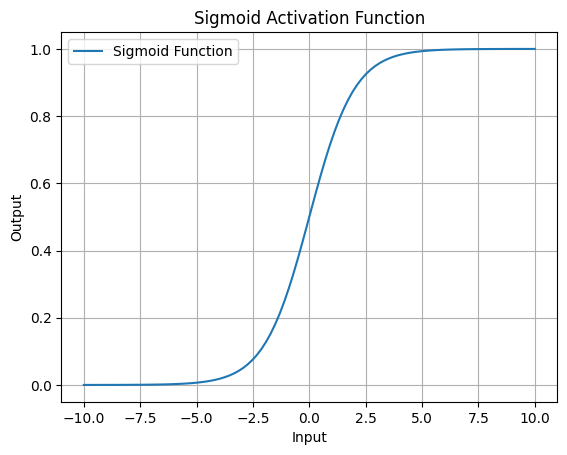

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate data
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()


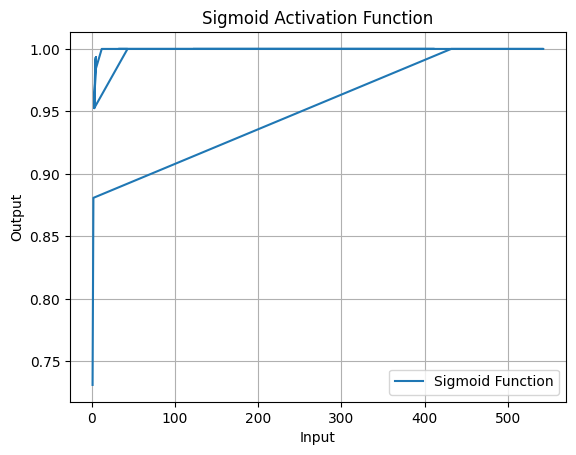

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate data
x = np.array([1, 2,432, 543, 32,43, 3, 5, 3, 4, 5, 4, 12, 412, 123])
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()


## The Rectified Linear Activation Function

![relu_func.png](../references/relu_activation.png)

- if x is less than or equal to 0, then y is 0
- otherwise y is equal to x
- allows positive inputs to pass through unchanged

- Simpler than Sigmoid
- simple and yet powerful activation function
- ReLU helps preserve important information in the neural network
- most widely used activation function (at time of writing)
- reasons for popularity: speed and efficiency

Reason ReLU is Interesting:
- extremely close to being a linear activation
- remains nonlinear due to bend after 0
- introducing nonlinearity, which allows the network to learn more complex patterns and relationships

![linears_vs_nonlinear.png](../references/linears_vs_nonlinear.png)

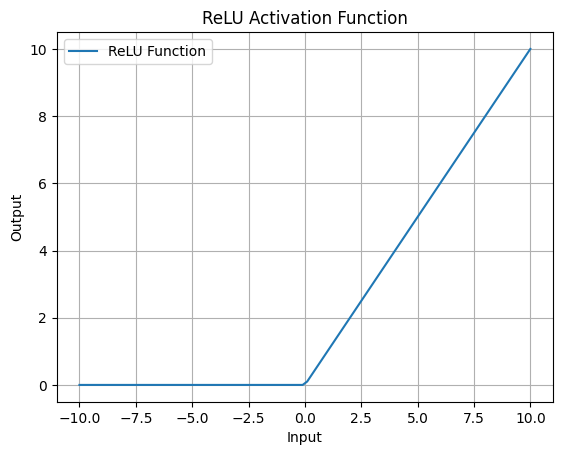

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Generate data
x = np.linspace(-10, 10, 100)
y = relu(x)

# Plot the ReLU function
plt.plot(x, y, label='ReLU Function')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()


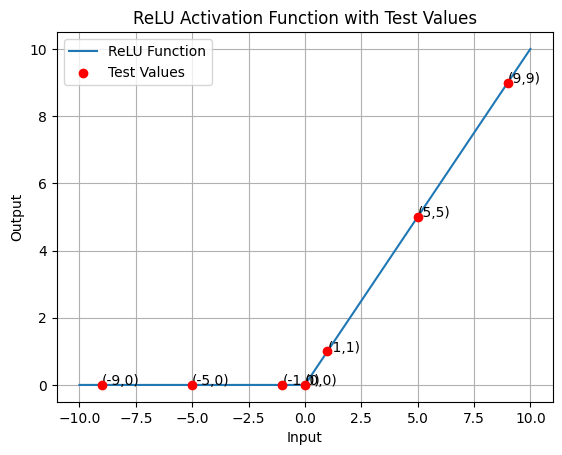

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Generate data
x = np.linspace(-10, 10, 100)
y = relu(x)

# Generate test practice values
test_values = np.array([-9, -5, -1, 0, 1, 5, 9])
test_outputs = relu(test_values)

# Plot the ReLU function
plt.plot(x, y, label='ReLU Function')
plt.scatter(test_values, test_outputs, color='red', zorder=5, label='Test Values')
for (i, j) in zip(test_values, test_outputs):
    plt.text(i, j, f'({i},{j})')

plt.title('ReLU Activation Function with Test Values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()


## Why Use Activation Functions?

Linear Problems:
- very simple problems in life are linear in nature
- ex. price of some number of shirts is linearly related to the number of shirts

Nonlinear Problems:
- most problems in life are nonlinear in nature
- Main attraction of neural networks is their ability to model complex nonlinear relationships
- ex. price of a home has many factors size, location, rooms, etc. (not linearly related)
- ex. sine wave

![sine_wave.png](../references/sine_wave.png)


Neural Networking Fitting to Sine Wave without Activation Function(just linear activation):
![sine_wave_no_activation.png](../references/sine_linear.png)

Neural Netorking Fitting to Sine Wave with ReLU Activation Function:
![sine_wave_relu_activation.png](../references/sine_relu.png)

## Linear Activation in the Hidden Layers

No matter what you make the neurons weights and biases, the output of the neuron will be perfectly linear to y=x of the activation function
![linear_activation_hidden.png](../references/linear_activation_hidden.png)

## ReLU Activation in a Pair of Neurons

Pair of neurons with single inputs and ReLU activation functions, other negative weight

![relu_activation_hidden.png](../references/pair_relu.png)

## ReLU Activation in the Hidden Layers

![relu_activation_hidden.png](../references/relu_part_1.png)

![relu_activation_hidden.png](../references/relu_part_2.png)

![relu_activation_hidden.png](../references/relu_part_3.png)

## ReLU Activation Function Code

In [45]:
# 1st Implementation of ReLU
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2,-100]

output = []
for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [46]:
# 2nd Implementation of ReLU

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2,-100]

output = []
for i in inputs:
    output.append(max(0, i))

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [47]:
# 3rd Implementation of ReLU (using numpy)

import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2,-100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [48]:
# Supplemental Code Necessary to Run

import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Create dataset
#X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
# 2 neurons for per layer (3 layers)
#dense1 = Layer_Dense(2, 3)

# Perform a forward pass of our training data through this layer
#dense1.forward(X)

# Let's see output of the first few samples:
#print(f"Dense Weights: \n{dense1.weights[:5]}")
#print(f"Dense Biases: \n{dense1.biases[:5]}")
#print(f"Dense Outputs: \n{dense1.output[:5]}")


In [49]:
# Our Rectified Linear Activation Class

# ReLU activation
class Activation_ReLU:
    # forward pass
    def forward(self, inputs):
        # calculate output values from inputs
        self.output = np.maximum(0, inputs)

In [50]:
# create dataset
X, y = spiral_data(samples=100, classes=3)

# create dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2,3)

# create ReLU activation (used in Dense)
activation1 = Activation_ReLU()

# make a forward pass of our training data through this layer
dense1.forward(X)

# forward pass through activation function
# takes in output from previous layer
activation1.forward(dense1.output)

# lets see output of the first few samples
print(f"Output (No Activation): \n{dense1.output[:5]}")
print(f"Output (with ReLU): \n{activation1.output[:5]}")

Output (No Activation): 
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]
Output (with ReLU): 
[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


This output is different in that all the negative values had been deleted and replaced with 0's
- thats all there is to the rectified linear activation function

## The Softmax Activation Function

- If we want to switch model to become a classifier (instead of regression), we need to change the output layer activation function
- Softmax Activation Function perfect for multi-class classification problems
- Softmax squashes the output between 0 and 1
- Softmax takes in non-normalized output and returns a probability distribution
- Softmax output represents confidence scores for each class and will add up to 1
- Function: f(x) = e^x / sum(e^x)

### Exponentiation (e^x)

![exponentiation.png](../references/exponential_function.png)

- serves multiple purposes:
1. converts negative values to positive
2. adds stability (more about difference than magnitudes)

In [51]:
layer_outputs = [4.8, 1.21, 2.385]

# e - mathmatical constant, we use E here to match a common coding
# style where constants are uppercase
E = 2.71828182846

# for each value in a vector, calculate the exponential value
exp_values = []
for output in layer_outputs:
    exp_values.append(E**output) # ** - power operator in Python
print(f"Exponentiated Values: \n{exp_values}")

Exponentiated Values: 
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [52]:
# now normalize values
norm_base = sum(exp_values) # sum of all exponentiated values
print(f"Sum of Exponentiated Values: \n{norm_base}")
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print(f"Normalized Exponentiated Values: \n{norm_values}")
# print(f"Sum of Normalized Values: \n{sum(norm_values)}")

Sum of Exponentiated Values: 
135.72296483641975
Normalized Exponentiated Values: 
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]


In [53]:
# same operations in Numpy
import numpy as np

# values from the earlier example
layer_outputs = [4.8, 1.21, 2.385]

# for each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print(f"Exponentiated Values: {exp_values}")

# now normalize values
norm_values = exp_values / np.sum(exp_values)
print(f"Normalized Exponentiated Values: {norm_values}")
#print(f"Sum of Normalized Values: {np.sum(norm_values)}")

Exponentiated Values: [121.51041752   3.35348465  10.85906266]
Normalized Exponentiated Values: [0.89528266 0.02470831 0.08000903]


In [54]:
# training in batches

# get unnormalized probabilities
#exp_values = np.exp(inputs)

# normalize them for each sample
#probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [55]:
# we keep the same dimensions as the input

# Softmax Activation
class Activation_Softmax:
    # forward pass
    def forward(self, inputs):
        # get unnormalized probabilities - e^x
        exp_values = np.exp(inputs - np.max(inputs,
                                            axis=1,
                                            keepdims=True))
        # normalize them for each sample - e^x / sum(e^x)
        probabilities = exp_values / np.sum(exp_values,
                                            axis=1,
                                            keepdims=True)
        self.output = probabilities

In [56]:
softmax = Activation_Softmax()

softmax.forward([[1, 2, 3]])
print(f"Softmax Output: {softmax.output}")

Softmax Output: [[0.09003057 0.24472847 0.66524096]]


In [59]:
# create dataset
X, y = spiral_data(samples=100, classes=3)

# create dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# create ReLU activation (to be used with Dense Layer)
activation1 = Activation_ReLU()

# create second Dense layer with 3 input features (as we take output of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# create Softmax activation (to be used with Dense Layer)
activation2 = Activation_Softmax()

# make a forward pass of our training data through this layer
dense1.forward(X)

# make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# lets see output of the first few samples:
print(f"Output (No Activation) - dense1.output: \n{dense1.output[:5]}")
print(f"Output (Softmax): - activation1.output \n{activation1.output[:5]}")

print(f"Output (No Activation) - dense2.output: \n{dense2.output[:5]}")
print(f"Output (Softmax): - activation2.output \n{activation2.output[:5]}")

Output (No Activation) - dense1.output: 
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.3274694e-04 -1.4993091e-04  7.0769514e-05]
 [ 2.6413624e-04 -3.0127459e-04  1.4032277e-04]
 [ 4.0832051e-04 -4.2161276e-04  2.2429589e-04]
 [ 5.4415618e-04 -5.4084673e-04  3.0242660e-04]]
Output (Softmax): - activation1.output 
[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3274694e-04 0.0000000e+00 7.0769514e-05]
 [2.6413624e-04 0.0000000e+00 1.4032277e-04]
 [4.0832051e-04 0.0000000e+00 2.2429589e-04]
 [5.4415618e-04 0.0000000e+00 3.0242660e-04]]
Output (No Activation) - dense2.output: 
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 6.7541305e-07 -3.3742191e-07 -4.0220743e-07]
 [ 1.3356894e-06 -6.7111648e-07 -8.0029457e-07]
 [ 2.1880355e-06 -1.0415991e-06 -1.2372542e-06]
 [ 2.9746509e-06 -1.3900799e-06 -1.6488993e-06]]
Output (Softmax): - activation2.output 
[[0.33333334 0.33333334 0.33333334]
 [0.33333355 0.3333332  0.3333332 ]
 [0.33333382 0.33333313 0.3333331 ]
 [0.3333341  0.3333330

In [92]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# dense layer
class Layer_Dense:
    # layer initialization
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.bias = np.zeros((1, n_neurons))
    
    # forward
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.bias

class Activation_ReLU:
    # forward
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    
class Activation_Softmax:
    # forward
    def forward(self, inputs):
        

df = Layer_Dense(2,2)
#print(df.weights)
df.forward(X)
#print(df.output[:5])

activation1 = Activation_ReLU()

activation1.forward(df.output)

#print(activation1.output)

[[0.00000000e+00 0.00000000e+00]
 [1.12773159e-04 2.28857360e-04]
 [2.18248970e-04 4.56661830e-04]
 [4.29392268e-04 6.86656451e-04]
 [6.16081525e-04 9.05896770e-04]
 [6.18059305e-04 1.14909816e-03]
 [7.93347019e-04 1.37924019e-03]
 [1.39206974e-03 1.26396178e-03]
 [1.24513055e-03 1.80776860e-03]
 [1.36192259e-03 2.04500370e-03]
 [1.99285825e-03 1.79187302e-03]
 [2.24038353e-03 1.65866455e-03]
 [7.09943066e-04 0.00000000e+00]
 [2.63491087e-03 2.11643567e-03]
 [1.94311759e-03 0.00000000e+00]
 [2.07524700e-03 0.00000000e+00]
 [3.25745321e-03 2.44187564e-03]
 [1.75501045e-03 0.00000000e+00]
 [3.61994118e-03 2.06102198e-03]
 [3.44372075e-03 4.00159461e-03]
 [1.24983373e-03 0.00000000e+00]
 [4.21090331e-03 2.33289017e-03]
 [8.35058570e-04 0.00000000e+00]
 [2.85066571e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.23613281e-03 0.00000000e+00]
 [1.37025979e-03 0.00000000e+00]
 [2.29426776e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.000000

## Full Code up to this point

In [58]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# dense layer
class Layer_Dense:
    # layer initialization
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # forward pass
    def forward(self, inputs):
        # calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases
    
class Activation_ReLU:
    # forward pass
    def forward(self, inputs):
        # calculate output values from inputs
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    # forward pass
    def forward(self, inputs):
        # get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# create dataset
X, y = spiral_data(samples=100, classes=3)

# create dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# create ReLU activation (to be used with Dense Layer)
activation1 = Activation_ReLU()

# create second Dense layer with 3 input features (as we take output of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# create Softmax activation (to be used with Dense Layer)
activation2 = Activation_Softmax()

# make a forward pass of our training data through this layer
dense1.forward(X)

# make a forward pass through activation function
# it takes the output of first dense layer here
# ReLU Activation
activation1.forward(dense1.output)

# make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# make a forward pass through activation function
# it takes the output of second dense layer here
# Softmax Activation
activation2.forward(dense2.output)

# lets see output of the first few samples:
print(f"Output (No Activation): \n{dense2.output[:5]}")
print(f"Output (Softmax): \n{activation2.output[:5]}")

Output (No Activation): 
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.8183968e-07 -1.5235776e-07  1.2281279e-06]
 [-5.0631292e-07 -4.2422371e-07  3.4195891e-06]
 [-8.4041352e-07 -7.0415609e-07  5.6760728e-06]
 [-1.1393766e-06 -9.5464793e-07  7.6952419e-06]]
Output (Softmax): 
[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
